In [4]:
import tensorflow as tf

from tensorflow.keras import layers, models

base_model = tf.keras.applications.vgg16.VGG16(
    input_shape=(size_, size_, 3),
    include_top=False,
    weights='imagenet')


base_model.trainable = False

flatten_layer = layers.Flatten()
prediction_layer = layers.Dense(jumlah_huruf, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    prediction_layer
])

model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ["accuracy"])
#model.summary()

model.load_weights("vgg_0.h5")

In [5]:
import glob
import numpy as np
import cv2

x = []
y = []

list_folder = glob.glob("thai_output/test/*")
for c, nama_folder in enumerate(list_folder):
    list_gambar = glob.glob(nama_folder+"/*.png")
    for nama_gambar in list_gambar:
        gambar = cv2.imread(nama_gambar)/255
        gambar = cv2.resize(gambar, (size_, size_))
        x.append(gambar)
        y.append(c)

x = np.array(x)
y = np.array(y)

In [6]:
dict_index_to_kelas = {0: 'b',
 1: 'ch1',
 2: 'ch2',
 3: 'ch3',
 4: 'ch4',
 5: 'd1',
 6: 'd2',
 7: 'f1',
 8: 'f2',
 9: 'h1',
 10: 'h2',
 11: 'k',
 12: 'kh1',
 13: 'kh2',
 14: 'kh3',
 15: 'kh4',
 16: 'kh5',
 17: 'l1',
 18: 'l2',
 19: 'm',
 20: 'n1',
 21: 'n2',
 22: 'ng',
 23: 'o',
 24: 'p',
 25: 'ph1',
 26: 'ph2',
 27: 'ph3',
 28: 'r',
 29: 's1',
 30: 's2',
 31: 's3',
 32: 's4',
 33: 't1',
 34: 't2',
 35: 'th1',
 36: 'th2',
 37: 'th3',
 38: 'th4',
 39: 'th5',
 40: 'th6',
 41: 'w',
 42: 'y1',
 43: 'y2'}

In [7]:
y_pred = model.predict(x)

43/43 [==============================] - 10s 230ms/step


In [8]:
y_pred = [np.argmax(_) for _ in y_pred]

In [9]:
from sklearn.metrics import classification_report

print (classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        31
           3       1.00      0.97      0.98        31
           4       0.97      1.00      0.98        31
           5       0.97      1.00      0.98        31
           6       1.00      1.00      1.00        31
           7       1.00      0.81      0.89        31
           8       1.00      0.97      0.98        31
           9       1.00      1.00      1.00        31
          10       1.00      1.00      1.00        31
          11       1.00      0.94      0.97        31
          12       0.97      0.97      0.97        31
          13       1.00      0.90      0.95        31
          14       1.00      1.00      1.00        31
          15       1.00      1.00      1.00        31
          16       0.97      0.94      0.95        31
          17       1.00    

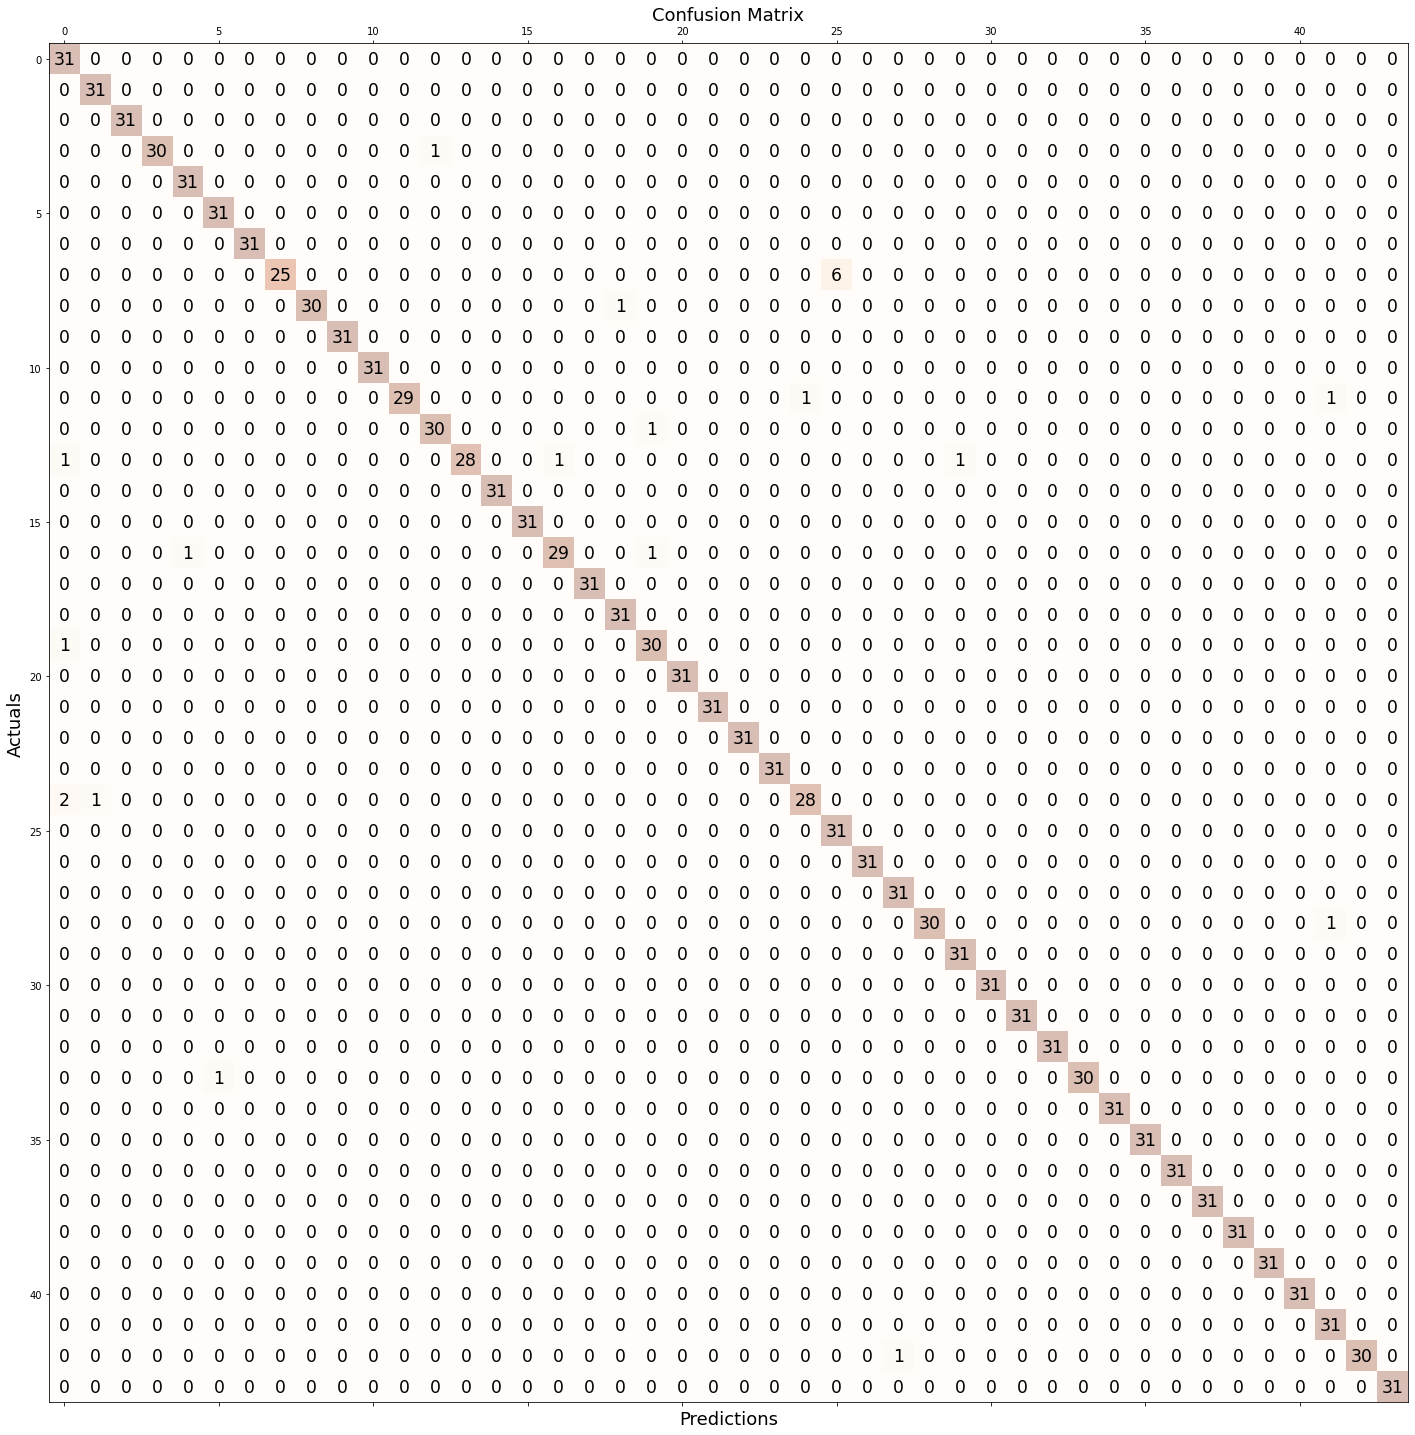

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(figsize=(25, 25))
conf_matrix = confusion_matrix(y, y_pred)
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()